# Examples to use the tug-of-war package

In this notebook we present several examples of simulating the antigen extraction process using our tug-of-war package.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import script.brownian.theory as th
import script.brownian.scan_parameter as ps
import script.brownian.system as sb
import script.brownian.utilities as utl
from importlib import reload

In [18]:

prm = utl.getDefaultPrm().copy()
prm["Eb1"] = 10
prm["Eb2"] = 10
prm["f0"] = 20
prm["xb1"] = 1.5
prm["scheme"] = 'c' ### constant force
prm["potential"] = "linear-cubic"

utl.printPrm(prm)

prm info:
tm:	10000000.0
dt:	1.0
record_time:	1
time_unit:	0.01
potential:	linear-cubic
scheme:	c
r:	0.001
f0:	20
beta:	1.0
tL:	100
tH:	100
fH:	10
fL:	0
tS:	1000
xb1:	1.5
xb2:	2.0
Eb1:	10
Eb2:	10


## Simulate a single rupture event

In [3]:
sys = sb.System(prm)
sys.output= True
sys.manyRun = False
flag, p, tend, fend = sys.run1()
print("simulation finished")
print(">> bond breaking? : ", flag)
print(">> which bond was broken? (1: APC-Ag; 2: BCR-Ag): ", p)
print(">> rupture time: ", tend, "us")
print(">> rupture force: ", fend, "pN")

simulation finished
>> bond breaking? :  True
>> which bond was broken? (1: APC-Ag; 2: BCR-Ag):  2
>> rupture time:  2908.0 us
>> rupture force:  20.0 pN


Now we plot the rupture trajectory

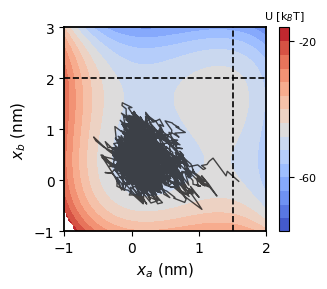

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from script.plot import Plot
### plot the trajectory

x1_trajs = sys.x1_traj.copy()
x2_trajs = sys.x2_traj.copy()

labelsize=11

pt = Plot(sys)
pt.coords="x1x2"
ax, hmap = pt.plotPotential(x_traj=x1_trajs, y_traj=x2_trajs, colorful=False, traj_color="k",
                      plotTraj=False, 
                      return_ax=True,
                      label_point=False,
                     sample_rate=300, figsize=(3.5,3))

step_sample = 0
ax.plot(x1_trajs[-step_sample:], x2_trajs[-step_sample:],'-k', alpha=0.7, linewidth=1.)
#ax.plot(x1_trajs_f[-step_sample:], x2_trajs_f[-step_sample:],'-r', alpha=1, linewidth=1.)

#pt.plotPotential(overlay=True,colorful=False, traj_color="k")
ax.set( xlim=(-1, 2), ylim=(-1,3), xticks=[-1, 0,1,2])
ax.set_xlabel("$x_a$ (nm)", fontsize=labelsize)
ax.set_ylabel("$x_b$ (nm)", fontsize=labelsize)
#ax.set(title="F="+str(sys.force_gen.f0)+"pN")

cbar_ticks=[-60, -20, 20]
cbar = plt.colorbar(hmap, ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_ticks, fontsize=8)
cbar.ax.set_title("U [k$_B$T]", fontsize=8)
if False:
    xmin = -1.0*sys.bd1.x1
    xmax = 1.5*sys.bd1.x1
    ymin = -1.0*sys.bd2.x1
    ymax = 1.5*sys.bd2.x1

    #ax.hlines(y=fprm["xb2"]/2, xmin=xmin, xmax=xmax , color='k', linestyle='dotted')
    #ax.vlines(x=fprm["xb1"]/2, ymin=ymin, ymax=ymax , color='k', linestyle='dotted')
    divider = make_axes_locatable(ax)
    axHistx = divider.append_axes("top", size=0.5, pad=0.15, sharex=ax,)
    axHisty = divider.append_axes("right", size=0.5, pad=0.1, sharey=ax)

    # make some labels invisible
    axHistx.xaxis.set_tick_params(labelbottom=False)
    axHisty.yaxis.set_tick_params(labelleft=False)



    # now determine nice limits by hand:
    binwidth = 0.15

    limx1 = (int((xmax-xmin)/binwidth)+1)*binwidth
    limx2 = (int((ymax-ymin)/binwidth) + 1)*binwidth

    bins1 = np.arange(-limx1, limx1 + binwidth, binwidth)
    bins2 = np.arange(-limx2, limx2 + binwidth, binwidth)
    axHistx.hist(sys.x1List, bins=bins1, ec="w", color="gray")
    axHisty.hist(sys.x2List, bins=bins2, orientation='horizontal', ec="w", color="gray")


    axHistx.set_ylabel("count", fontsize=labelsize)
    axHisty.set_xlabel("count", fontsize=labelsize)
    axHistx.set(ylim=(0, 200))
    axHisty.set(xlim=(0, 200))

    axHistx.set(title="F="+str(sys.force_gen.f0)+"pN")
    axHisty.text(x=20, y=-0.7, s="{:.1f}%".format(100*len(sys.x2List)/(len(sys.x1List)+len(sys.x2List))), fontsize=9)
    axHistx.text(x=0.7*sys.bd1.x1, y=20, s="{:.1f}%".format(100-100*len(sys.x2List)/(len(sys.x1List)+len(sys.x2List))), fontsize=9)
    
    #axHisty.text(x=-0.02, y=-0.5, s="<0.01%")
plt.tight_layout()
plt.show()

#print(len(sys.x2List)/(len(sys.x1List)+len(sys.x2List)))




## Simulation many trajectories to get extraction chance

In [27]:
prm["f0"] = 15
sys = sb.System(prm)
sys.output= True
sys.manyRun = False
sys.numSample = 1000
sys.run()
print("simulation finished")
print(">> simulated extraction chance : ", sys.eta)
print(">> average rupture time: ", sys.tend)

progress: |||||||||||||||||||99%
count	f	eta	end
1000	15.00	0.214	3334.94
simulation finished
>> simulated extraction chance :  0.214
>> average rupture time:  3334.942


In [29]:
import script.theory as theory
reload(theory)
eta = theory.extRatio_linear_cubic(prm["Eb1"],prm["Eb2"], prm["f0"], prm["xb1"], prm["xb2"], 
                                   output=True, Eb_min=1, m=1)[0]
tend = theory.tau_linear_cubic(prm["xb1"], prm["xb2"],prm["Eb1"],prm["Eb2"], prm["f0"],
                                 output=True, Eb_min=1, m=1)[2]

print("theoretical results: ")
print(">> extraction chance: ", eta)
print(">> rupture time: ", tend)

theoretical results: 
>> extraction chance:  0.19582654559050616
>> rupture time:  2918.5925551629466


We can see the simulation results are close to the analytical solution. 

# Scan parameters to get the discrimination curve

In [ ]:
sys = sb.System(prm)
sys.output= False
sys.manyRun = False
sys.numSample= 1000

In [14]:
scanner= ps.Scan_prm(sto=sys)

scanner.run("Eb2", np.linspace(10, 20, 11))

Eb2 	eta	tend	fend
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.142	1025.08
10.000	0.142	1025.078	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.264	1694.98
11.000	0.264	1694.979	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.434	2344.89
12.000	0.434	2344.892	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.630	3260.54
13.000	0.630	3260.538	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.780	3876.62
14.000	0.780	3876.622	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.902	4575.36
15.000	0.902	4575.361	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.938	4721.21
16.000	0.938	4721.213	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.975	5059.63
17.000	0.975	5059.631	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	20.00	0.991	5151.22
18.000	0.991	5151.220	20.000
progress: |||||||||||||||||||99%
count	f	eta	end
1000	

On the other hand, we can calculate the extraction chance based on our analytical expression

In [30]:
eblist = np.linspace(10, 22, 100)
etalist = []
for eb in eblist:
    eta = theory.extRatio_linear_cubic(prm["Eb1"],eb, 20, prm["xb1"], prm["xb2"], 
                                   output=True, Eb_min=1, m=1)[0]
    etalist.append(eta)

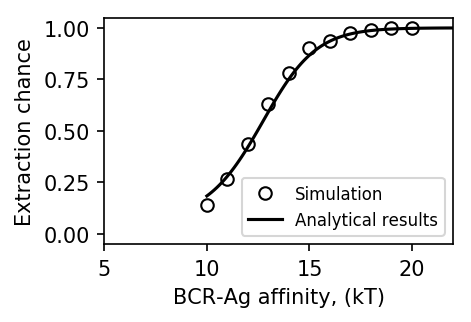

In [37]:
### plot the discrimination curve
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
plt.plot(scanner.prm_list, scanner.etalist, 'ok', fillstyle='none')
plt.plot(eblist, etalist, '-k')
plt.ylim(-0.05, 1.05)
plt.xlim(5, 22)
plt.xlabel("BCR-Ag affinity, (kT)")
plt.ylabel("Extraction chance")
plt.legend(["Simulation", "Analytical results"], fontsize=8)
plt.show()

## Simulate GC evolution

In [36]:
import script.evolution.model.GC as gc
import script.evolution.model.prm as prm
import script.evolution.model.manyRun as mr
reload(gc)
gc0 = gc.GC(prm=prm.prm_list)

In [37]:
gc0.run(100)

Info: finished!|||||||||||||||100%


True

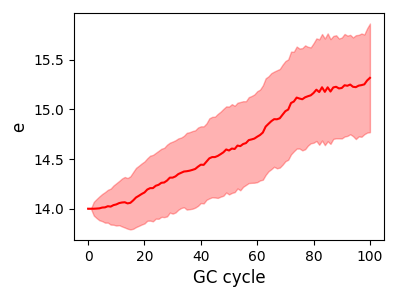

In [38]:
ax = gc0.plotQty("e", filling=True)

In [28]:
mr0 = mr.manyRun(prm=prm.prm_list)

In [30]:
mr0.sample_rate=1
mr0.num_run = 5
mr0.run(output=True)

manyRun: check parameter: f=0.000000 , xa= 1.500000
>>>> starting GC 0, last run: mr= 0.000, std=0.000, eta=0.000, tm=0.0, success=0
Info: finished!|||||||||||||||100%
>>>> starting GC 1, last run: mr= -0.003, std=0.945, eta=0.973, tm=300.0, success=1
Info: finished!|||||||||||||||100%
>>>> starting GC 2, last run: mr= 0.001, std=0.702, eta=0.977, tm=300.0, success=2
Info: finished!|||||||||||||||100%
>>>> starting GC 3, last run: mr= 0.003, std=0.808, eta=0.960, tm=300.0, success=3
Info: finished!|||||||||||||||100%
>>>> starting GC 4, last run: mr= 0.005, std=0.786, eta=0.977, tm=300.0, success=4
Info: finished!|||||||||||||||100%
finished! success=5, dead=0, percen=1.000	
many run: summary: surv_prob = 1.0000	, Eb = 16.2641.732	, tau=0.257


True

In [44]:
import script.evolution.model.utilities as utl_evo
reload(utl_evo)
utl_evo.print_dict(prm.prm_list, 2)

Items held:
       feedback: 	False		         output: 	True
       randomAb: 	True		        useWeek: 	False
         useSim: 	True		          debug: 	False
        useBell: 	False		       goodDiff: 	False
    useBinomial: 	False		       dump_eta: 	False
   no_selection: 	False		dynamical_force: 	False
          death: 	random		    update_rule: 	topK
      potential: 	linear-cubic		            cag: 	100
             Eb: 	14		             Ea: 	14
            xb1: 	1.5		            xb2: 	2.0
             Td: 	0		             Tp: 	1000
         cutoff: 	200		             w0: 	8
             pd: 	0.05		             pa: 	0.7
             pm: 	0.5		          pm_xb: 	0.5
             Nc: 	2000		            Npc: 	5000
             N0: 	1000		            Nab: 	100
             dE: 	0.1		            dxb: 	0.1
              f: 	0		             df: 	0
           eta0: 	0.5		             tm: 	300
              r: 	0.0001		         Eb_min: 	2.0
       eta_file: 	fixedEb		